#### Many real-world datasets exhibit outliers or extreme values. Discuss the potential impact of outliers on measures of central tendency and variability, and propose at least two methods for identifying and handling outliers in data analysis. How can Python be used to implement these methods? Provide examples from real-world datasets to illustrate your points.

#### Potential outliers affect measures of central tendency (mean, standard deviation, range, etc.) by skewing theses measures towards a higher or lower value than what the majority of the data actually reflects. For example in a study that records finances, outliers would be seen if individuals like Bill Gates, Jeff Bezos, or Elon Musk were included. The vast wealth of these individuals would greatly alter measures of central tendency. Mean, STD, and range in this case would all be much higher due to the large wealth gap between the wealthiest and avergae individual. 
#### Other cases of outliers can be due to incorrect input by the person inputting data. These can normally be identified visually through an understanding of normal ranges. Sometimes outliers can be important to data analysis and should not be removed, especially in cases where we are trying to identify why these extremes occur. 

In [1]:
#let's import necessary packages and read a dataset to investigate how we can use python for outlier id
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('anemia_dataset.csv')

In [3]:
#read to dataframe for easier exploring
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     364 non-null    float64
 1   Age        364 non-null    float64
 2   Sex        364 non-null    float64
 3     RBC      365 non-null    object 
 4   PCV        365 non-null    object 
 5   MCV        365 non-null    object 
 6   MCH        365 non-null    object 
 7    MCHC      364 non-null    float64
 8    RDW       365 non-null    object 
 9   TLC        365 non-null    object 
 10   PLT /mm3  365 non-null    object 
 11   HGB       365 non-null    object 
dtypes: float64(4), object(8)
memory usage: 35.2+ KB


In [5]:
df.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


In [6]:
#drop first row as it does not contain actual data
df.drop(index=0,inplace=True)

In [7]:
#remove extra spaces
df.columns = data.columns.str.replace(' ', '')

In [8]:
#correct datatypes to float
df = df.dropna()
df =df.astype("float")

In [9]:
#print first 5 of dataframe
df.head() 

,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
1,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [10]:
#print summary statistics
df.describe()

,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,4.278736,36.762912,87.509121,28.227143,32.053407,15.116511,8.863571,223.750824,11.907692
std,105.221988,18.780854,0.497344,0.820166,6.830835,9.332164,3.865998,2.801790,2.176557,4.868502,99.407153,2.186686
min,1.000000,11.000000,0.000000,1.360000,13.100000,55.700000,14.700000,23.600000,10.600000,2.000000,10.000000,4.200000
25%,91.750000,28.000000,0.000000,3.780000,32.900000,83.175000,26.300000,30.300000,13.600000,5.900000,153.000000,10.600000
50%,182.500000,44.500000,0.000000,4.335000,36.800000,87.950000,28.200000,31.700000,14.800000,7.935000,210.000000,12.100000
75%,273.250000,60.000000,1.000000,4.800000,41.850000,91.875000,30.400000,33.300000,16.100000,10.205000,268.250000,13.400000
max,364.000000,89.000000,1.000000,6.900000,56.900000,124.100000,41.400000,50.200000,29.200000,42.420000,660.000000,19.600000


### Method 1 - Visualize with boxplot

<AxesSubplot:>

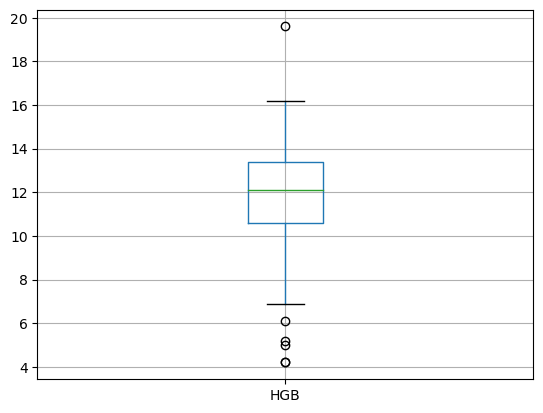

In [11]:
# one way to identify outliers is with visualization 
df.boxplot(column=['HGB'])

In [12]:
# lets see how dropping any HGB over 13 grams changes central tendency, since these levels would not indicate anemia
df_hgb_trimmed = df.drop(df[df['HGB'] > 13].index)

In [13]:
print("Original Hemoglobin mean: ", np.mean(df['HGB']))
print("Original Hemoglobin STD: ", np.std(df['HGB']))
print("")
print("New Hemoglobin mean: ", np.mean(df_hgb_trimmed['HGB']))
print("New Hemoglobin STD: ", np.std(df_hgb_trimmed['HGB']))

Original Hemoglobin mean:  11.907692307692317
Original Hemoglobin STD:  2.1836797640494012

New Hemoglobin mean:  10.774688796680502
New Hemoglobin STD:  1.7144438891986473


### Method 2 - Interquartile range

In [14]:
#calculate 1st and 3rd quartie and subtract to find midpoint - lets do this for plt
Q1 = df['PLT/mm3'].quantile(0.25)
Q3 = df['PLT/mm3'].quantile(0.75)
IQR = Q3-Q1
print("IQR is: ", IQR)

IQR is:  115.25


In [19]:
# find uper and lower range 
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# find indexes of outliers
lower_range = np.where(df['PLT/mm3'] <= lower)[0]
upper_range = np.where(df['PLT/mm3'] >= upper)[0]

#drop from array
df_plt_outliers = df.drop(index=lower_range, inplace=True)
df_plt_outliers = df.drop(index=upper_range)

In [20]:
print("Original PLT mean: ", np.mean(df['PLT/mm3']))
print("Original PLT STD: ", np.std(df['PLT/mm3']))
print("")
print("New PLT mean: ", np.mean(df_plt_outliers['PLT/mm3']))
print("New PLT STD: ", np.std(df_plt_outliers['PLT/mm3']))

Original PLT mean:  223.7508241758242
Original PLT STD:  99.27051079000023

New PLT mean:  224.0437142857143
New PLT STD:  100.43793849468055


#### References

GfG. (2024, January 24). Detect and remove the outliers using Python. GeeksforGeeks. https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/ 
Goyal, C. (2021, May 16). Why you shouldn’t just delete outliers. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/ 
Goyal, C. (2024, January 8). Outlier Detection & Removal: How to Detect & Remove Outliers (updated 2024). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/ 
Vohra, Rajan; pahareeya, jankisharan; Hussain, Abir (2021), “Complete Blood Count Anemia Diagnosis”, Mendeley Data, V1, doi: 10.17632/dy9mfjchm7.1 [Dataset] https://www.kaggle.com/datasets/saurabhshahane/anemia-diagnosis-dataset